In [1]:
import os
import json
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# import data from data-csv
keypoint_df = pd.read_csv('./keypoints.csv', index_col=0)
keypoint_df

,nose_pixel_x,nose_pixel_y,nose_scaled_x,nose_scaled_y,nose_score,left_eye_pixel_x,left_eye_pixel_y,left_eye_scaled_x,left_eye_scaled_y,left_eye_score,...,left_ankle_pixel_y,left_ankle_scaled_x,left_ankle_scaled_y,left_ankle_score,right_ankle_pixel_x,right_ankle_pixel_y,right_ankle_scaled_x,right_ankle_scaled_y,right_ankle_score,pose
./dataset-for-classification/supta-matsyendrasana/46a4ab66d050f9f6570ffd40f061c51f7b04af3da891c1da1ad293df25f17f9a.png,202.175170,298.778470,0.069002,0.495455,1.030708,165.459950,285.511630,0.019108,0.469697,0.881244,...,57.634674,1.000000,0.027273,0.227953,887.265900,57.634674,1.000000,0.027273,0.343377,supta-matsyendrasana
./dataset-for-classification/adho-mukha-vrksasana/590b6ca754be92a8d9ecb9e894e11c937818b7cec5819dba7ec0dc4ba8e6815f-flipped.png,56.103966,208.161040,0.608108,0.571683,0.229484,60.726128,217.933300,0.668919,0.605521,0.172274,...,43.061104,0.445946,0.000000,0.363072,85.634460,331.857400,0.996622,1.000000,0.322895,adho-mukha-vrksasana
./dataset-for-classification/supta-matsyendrasana/e80b428803dbf47d229a1fbe211970e1ba36c2a5466368b1ffd0ba24a562c013.png,526.922240,37.670162,0.977990,0.000000,0.847790,537.236400,49.325745,1.000000,0.053170,0.824407,...,177.537140,0.231579,0.638037,0.087167,68.616030,217.435090,0.000000,0.820041,0.154126,supta-matsyendrasana
./dataset-for-classification/supta-matsyendrasana/4187f021d7e3b2d92ce2bdfabb90126e0a1f648a5e846b5cd452cafa12a3761c.png,719.848270,104.002266,0.950276,0.174129,2.304453,736.857360,120.365540,1.000000,0.217247,2.170392,...,402.317320,0.828729,0.960199,0.227547,680.790470,417.421880,0.836096,1.000000,0.325802,supta-matsyendrasana
./dataset-for-classification/supta-matsyendrasana/8fbb0fb028119ef65cbbb6aff56ed0b6835ac79a589657f43c1d8210c23b7df2.png,81.610140,80.690690,0.041439,0.250000,0.404074,66.185000,80.284560,0.000000,0.248077,0.923455,...,185.471130,1.000000,0.746154,0.213681,433.141020,181.409880,0.985823,0.726923,0.097591,supta-matsyendrasana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dataset-for-classification/adho-mukha-vrksasana/4bbac5469eae0083c64a56b7a6a33223b276772560bfe7016963518a2fbac5e4-flipped.jpeg,157.068920,126.439600,0.857143,0.801843,0.277507,159.084640,126.214615,1.000000,0.800307,0.266186,...,8.998448,0.936508,0.000000,0.127793,157.964800,9.673398,0.920635,0.004608,0.130748,adho-mukha-vrksasana
./dataset-for-classification/adho-mukha-vrksasana/c3a7f3d38bdd6b0582be8f63da2c0989fbd7359e7d27aef702c8da77b4e9212b-flipped.jpeg,129.336720,183.221330,0.718182,0.889667,0.411975,131.300890,181.816970,0.781818,0.880911,0.243493,...,40.538680,0.254546,0.000000,0.365126,115.306880,41.381294,0.263636,0.005254,0.348224,adho-mukha-vrksasana
./dataset-for-classification/adho-mukha-vrksasana/3f9ebbb2ec7c7b80272612a2ee01858b3f8602ddd948c6fea8d38093f93c5a7e-flipped.jpeg,83.450180,195.288040,0.140187,0.751689,0.713268,80.384910,191.273600,0.018691,0.722973,1.274651,...,230.001080,0.710280,1.000000,0.461502,97.597530,229.292650,0.700934,0.994932,0.197748,adho-mukha-vrksasana
./dataset-for-classification/adho-mukha-vrksasana/13dee0e02799b6f8cc1b2a94ccc1f43163db96974e00ee8275b8067933e636c3-flipped.png,71.565600,352.429140,0.525424,0.761317,0.586782,93.532974,90.776450,0.706215,0.134156,0.157269,...,38.583256,0.649717,0.009053,0.572434,86.668170,37.896503,0.649717,0.007407,0.533143,adho-mukha-vrksasana


In [3]:
# get unique poses
unique_poses = keypoint_df['pose'].unique()
# sort unique poses alphabetically
sorted_poses = sorted(unique_poses)
pose_to_num = {pose: i for i, pose in enumerate(sorted_poses)}
pose_to_num

{'adho-mukha-svanasana': 0,
 'adho-mukha-vriksasana': 1,
 'adho-mukha-vrksasana': 2,
 'ananda-balasana': 3,
 'anjaneyasana': 4,
 'ardha-chandrasana': 5,
 'ardha-matsyendrasana': 6,
 'ardha-pincha-mayurasana': 7,
 'ardha-uttanasana': 8,
 'astavakrasana': 9,
 'baddha-konasana': 10,
 'bakasana': 11,
 'balasana': 12,
 'bharadvajasana-i': 13,
 'bhujangasana': 14,
 'bhujapidasana': 15,
 'bitilasana': 16,
 'camatkarasana': 17,
 'chakravakasana': 18,
 'chaturanga-dandasana': 19,
 'dandasana': 20,
 'dhanurasana': 21,
 'dwi-pada-viparita-dandasana': 22,
 'eka-pada-koundinyanasana-i': 23,
 'eka-pada-koundinyanasana-ii': 24,
 'eka-pada-rajakapotasana': 25,
 'eka-pada-rajakapotasana-ii': 26,
 'garudasana': 27,
 'gomukhasana': 28,
 'halasana': 29,
 'kapotasana': 30,
 'makarasana': 31,
 'malasana': 32,
 'marjaryasana': 33,
 'matsyasana': 34,
 'mayurasana': 35,
 'natarajasana': 36,
 'padmasana': 37,
 'paripurna-navasana': 38,
 'parivrtta-trikonasana': 39,
 'parsva-bakasana': 40,
 'pasasana': 41,
 'pas

In [4]:
# replace pose with number
keypoint_df['pose'] = keypoint_df['pose'].replace(pose_to_num)

In [5]:
# split data into train, validation and test
train, test = train_test_split(keypoint_df, test_size=0.2, random_state=42, stratify=keypoint_df['pose'])
train, valid = train_test_split(train, test_size=0.2, random_state=42, stratify=train['pose'])

In [6]:
X_train = train.drop(['pose'], axis=1)
y_train = train['pose']
X_valid = valid.drop(['pose'], axis=1)
y_valid = valid['pose']

In [7]:
X_valid

,nose_pixel_x,nose_pixel_y,nose_scaled_x,nose_scaled_y,nose_score,left_eye_pixel_x,left_eye_pixel_y,left_eye_scaled_x,left_eye_scaled_y,left_eye_score,...,left_ankle_pixel_x,left_ankle_pixel_y,left_ankle_scaled_x,left_ankle_scaled_y,left_ankle_score,right_ankle_pixel_x,right_ankle_pixel_y,right_ankle_scaled_x,right_ankle_scaled_y,right_ankle_score
./dataset-for-classification/utthita-trikonasana/506a60cebb5df430f9e4025bd0d0aec28b99e0dd6d7e9c4dc8cfc36321b84f97-flipped.png,49.085580,54.581840,0.037349,0.059259,1.183720,38.199818,55.985645,0.000000,0.065185,0.754898,...,43.818275,277.43588,0.019277,1.000000,0.487111,114.048980,277.435880,0.260241,1.000000,0.441233
./dataset-for-classification/utthita-hasta-padangusthasana/13885840a1431973dd1129c4a51223f36cc450ab0af10286d2967b96220a30f3.png,144.180150,65.682110,0.608087,0.065120,2.583537,149.828140,57.042515,0.634526,0.041927,1.437397,...,227.903150,87.61340,1.000000,0.123996,0.411750,87.368126,413.924440,0.342146,1.000000,0.686044
./dataset-for-classification/salamba-sarvangasana/94761d0771b886f21d6e577349a8f8668fc9b35b287841da716d6eddfa942c77-flipped.png,100.269104,436.554870,0.066997,0.893480,0.250344,90.503670,438.809480,0.002481,0.898990,0.799543,...,133.321350,72.43055,0.285360,0.003673,0.556419,134.072560,70.927460,0.290323,0.000000,0.355444
./dataset-for-classification/purvottanasana/8d198554efde5fa0588bef8487521e37330227978585cbaa904f8315d9b3fdd5.png,836.099500,10.026790,0.959572,0.000000,0.810589,860.706400,25.929834,1.000000,0.048458,0.903423,...,288.956970,297.72730,0.060642,0.876652,0.109213,289.680700,298.450160,0.061831,0.878855,0.091715
./dataset-for-classification/padmasana/390705ce634d26fd4b77e565abc8f0bfb53069d4ea6aec19668d7758385ce636.png,169.343900,56.552800,0.541096,0.042517,1.557930,181.672550,46.283997,0.592466,0.000000,2.888743,...,198.521670,287.80620,0.662671,1.000000,0.051192,145.919500,287.806200,0.443493,1.000000,0.085421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
./dataset-for-classification/viparita-karani/903a11cfe5a4e82b31dd951d3377147632553333c4d15a74e422ba8c0cb39ff4.png,162.893110,249.856690,0.390547,0.776471,2.197680,155.093800,249.856690,0.365672,0.776471,1.008089,...,353.586580,46.05626,0.998756,0.007353,0.542754,353.976560,44.107883,1.000000,0.000000,0.530397
./dataset-for-classification/salamba-sirsasana/5cab2b97e2de02103a67f5bf9a67487c61aa9114209c676369ed338da67a2bc6-flipped.png,98.719790,573.134100,0.432432,0.917453,0.516829,37.527798,571.698900,0.000000,0.913915,0.106215,...,99.197845,434.87930,0.435811,0.576651,0.226563,177.122020,606.621400,0.986487,1.000000,0.184322
./dataset-for-classification/camatkarasana/4ead732052de4bd803518a2a7e2d7edeeeeca4f604127c14cb3bc95deadc92cc.png,150.502730,81.140205,0.240594,0.380789,0.144222,151.795930,76.616930,0.244554,0.356775,0.098475,...,252.989440,170.31343,0.554455,0.854202,0.260340,398.151980,194.222170,0.999010,0.981132,0.292671
./dataset-for-classification/paschimottanasana/b82e74b1c70bec1a8f95acb3d3bc5965f3c68f0da94553c9e7f4858c6f7b2735.png,119.902270,54.431908,0.674221,0.356902,0.517342,126.200780,52.434350,0.712937,0.335017,0.590609,...,172.902000,85.00989,1.000000,0.691919,0.340759,171.212140,97.609860,0.989613,0.829966,0.163308


In [8]:
data_for_nn = pd.concat([train, valid])
# drop all columns if there is 'pixel' in the column name
train = train.drop(train.filter(regex='pixel').columns, axis=1)
train.to_csv("training_set.csv")
test.to_csv("test_set.csv")

In [9]:
# remove all columns with `pixel` in the name for train, valid and test
X_train = X_train.drop(X_train.filter(regex='pixel').columns, axis=1)
X_valid = X_valid.drop(X_valid.filter(regex='pixel').columns, axis=1)
X_test = test.drop(test.filter(regex='pixel').columns, axis=1)

In [10]:
# run basic logression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

test_scores_log = []
train_scores_log = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in C_values:
    logreg = LogisticRegression(C=c, solver='lbfgs', multi_class='multinomial', max_iter=10000)
    logreg.fit(X_train, y_train)
    train_scores_log.append(logreg.score(X_train, y_train))
    test_scores_log.append(logreg.score(X_valid, y_valid))

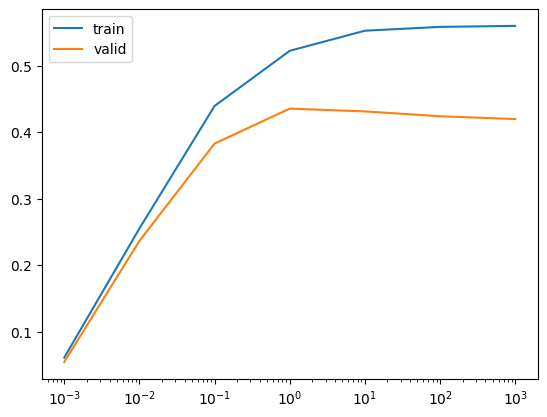

In [11]:
plt.plot(C_values, train_scores_log, label='train')
plt.plot(C_values, test_scores_log, label='valid')
plt.xscale('log')
plt.legend()
plt.show()


In [12]:
# run basic KNN model
from sklearn.neighbors import KNeighborsClassifier

test_scores_knn = []
train_scores_knn = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores_knn.append(knn.score(X_train, y_train))
    test_scores_knn.append(knn.score(X_valid, y_valid))

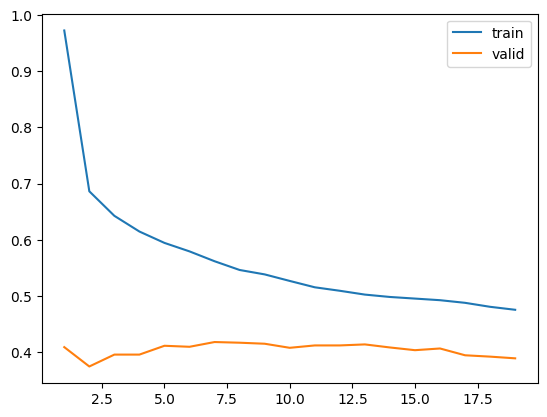

In [13]:
plt.plot(range(1, 20), train_scores_knn, label='train')
plt.plot(range(1, 20), test_scores_knn, label='valid')
plt.legend()

In [14]:
# run basic SVM model
from sklearn.svm import SVC

test_scores_svm = []
train_scores_svm = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in C_values:
    svm = SVC(C=c, gamma='auto')
    svm.fit(X_train, y_train)
    train_scores_svm.append(svm.score(X_train, y_train))
    test_scores_svm.append(svm.score(X_valid, y_valid))

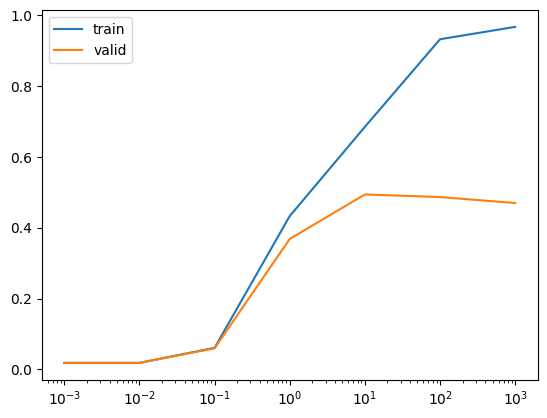

In [15]:
plt.plot(C_values, train_scores_svm, label='train')
plt.plot(C_values, test_scores_svm, label='valid')
plt.xscale('log')
plt.legend()
plt.show()

In [16]:
# run basic decision tree model
from sklearn.tree import DecisionTreeClassifier

test_scores_dt = []
train_scores_dt = []

for d in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    train_scores_dt.append(dt.score(X_train, y_train))
    test_scores_dt.append(dt.score(X_valid, y_valid))

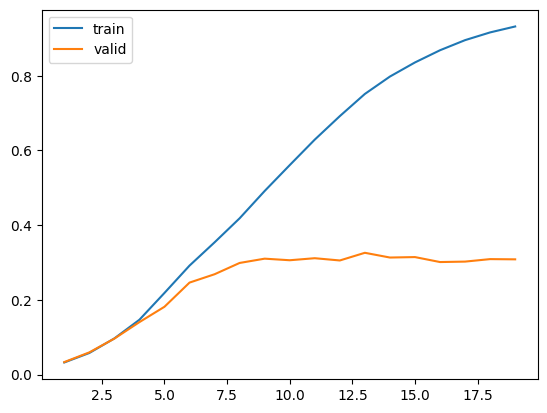

In [17]:
plt.plot(range(1, 20), train_scores_dt, label='train')
plt.plot(range(1, 20), test_scores_dt, label='valid')
plt.legend()
plt.show()

In [18]:
# run basic random forest model
from sklearn.ensemble import RandomForestClassifier

test_scores_rf = []
train_scores_rf = []

for d in range(1, 20):
    rf = RandomForestClassifier(max_depth=d)
    rf.fit(X_train, y_train)
    train_scores_rf.append(rf.score(X_train, y_train))
    test_scores_rf.append(rf.score(X_valid, y_valid))

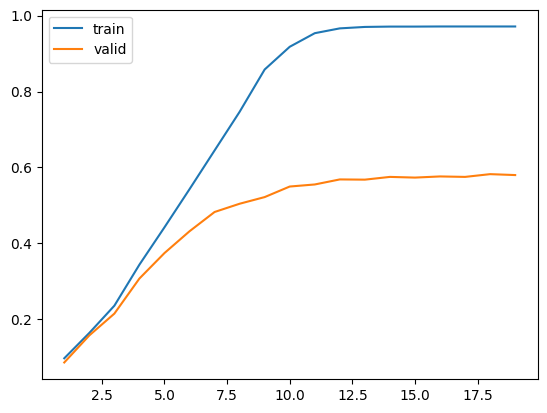

In [19]:
plt.plot(range(1, 20), train_scores_rf, label='train')
plt.plot(range(1, 20), test_scores_rf, label='valid')
plt.legend()
plt.show()

In [20]:
# run XGBoost model
from xgboost import XGBClassifier

test_scores_xgb = []
train_scores_xgb = []

for d in range(1, 20):
    xgb = XGBClassifier(max_depth=d)
    xgb.fit(X_train, y_train)
    train_scores_xgb.append(xgb.score(X_train, y_train))
    test_scores_xgb.append(xgb.score(X_valid, y_valid))

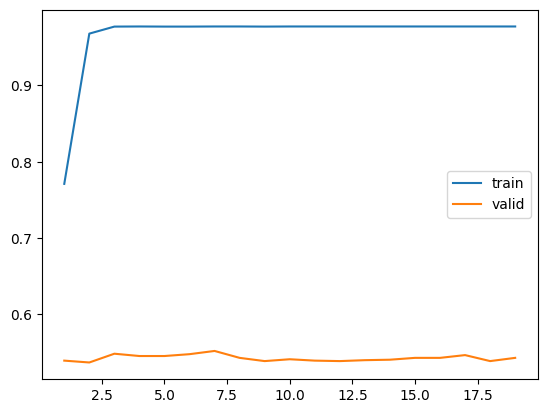

In [21]:
plt.plot(range(1, 20), train_scores_xgb, label='train')
plt.plot(range(1, 20), test_scores_xgb, label='valid')
plt.legend()
plt.show()

In [22]:
# random forest scored about 0.6 on validation set, so we will use it for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

gs_X_train = pd.concat([X_train, X_valid])
gs_y_train = pd.concat([y_train, y_valid])

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [15, 16, 17, 18, 19, 20],
    'warm_start': [True, False],
    'max_features': [2, 3],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 8],
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(gs_X_train, gs_y_train)

grid_search.best_params_


Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': 19,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500,
 'warm_start': False}

In [23]:
X_test = X_test.drop(['pose'], axis=1)
y_test = test['pose']

In [24]:
# run random forest model with best parameters
rf = RandomForestClassifier(max_depth=19, max_features=2, min_samples_leaf=2, min_samples_split=4, n_estimators=500, warm_start=False)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5991295938104448

In [25]:
y_pred = rf.predict(X_test);

In [26]:
# view confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# loop y_test and y_pred to get the correct labels
y_test_labels = []
y_pred_labels = []
labels = np.sort(unique_poses).tolist()

for i in range(len(y_test)):
    y_test_labels.append(unique_poses[y_test[i]])
    y_pred_labels.append(unique_poses[y_pred[i]])


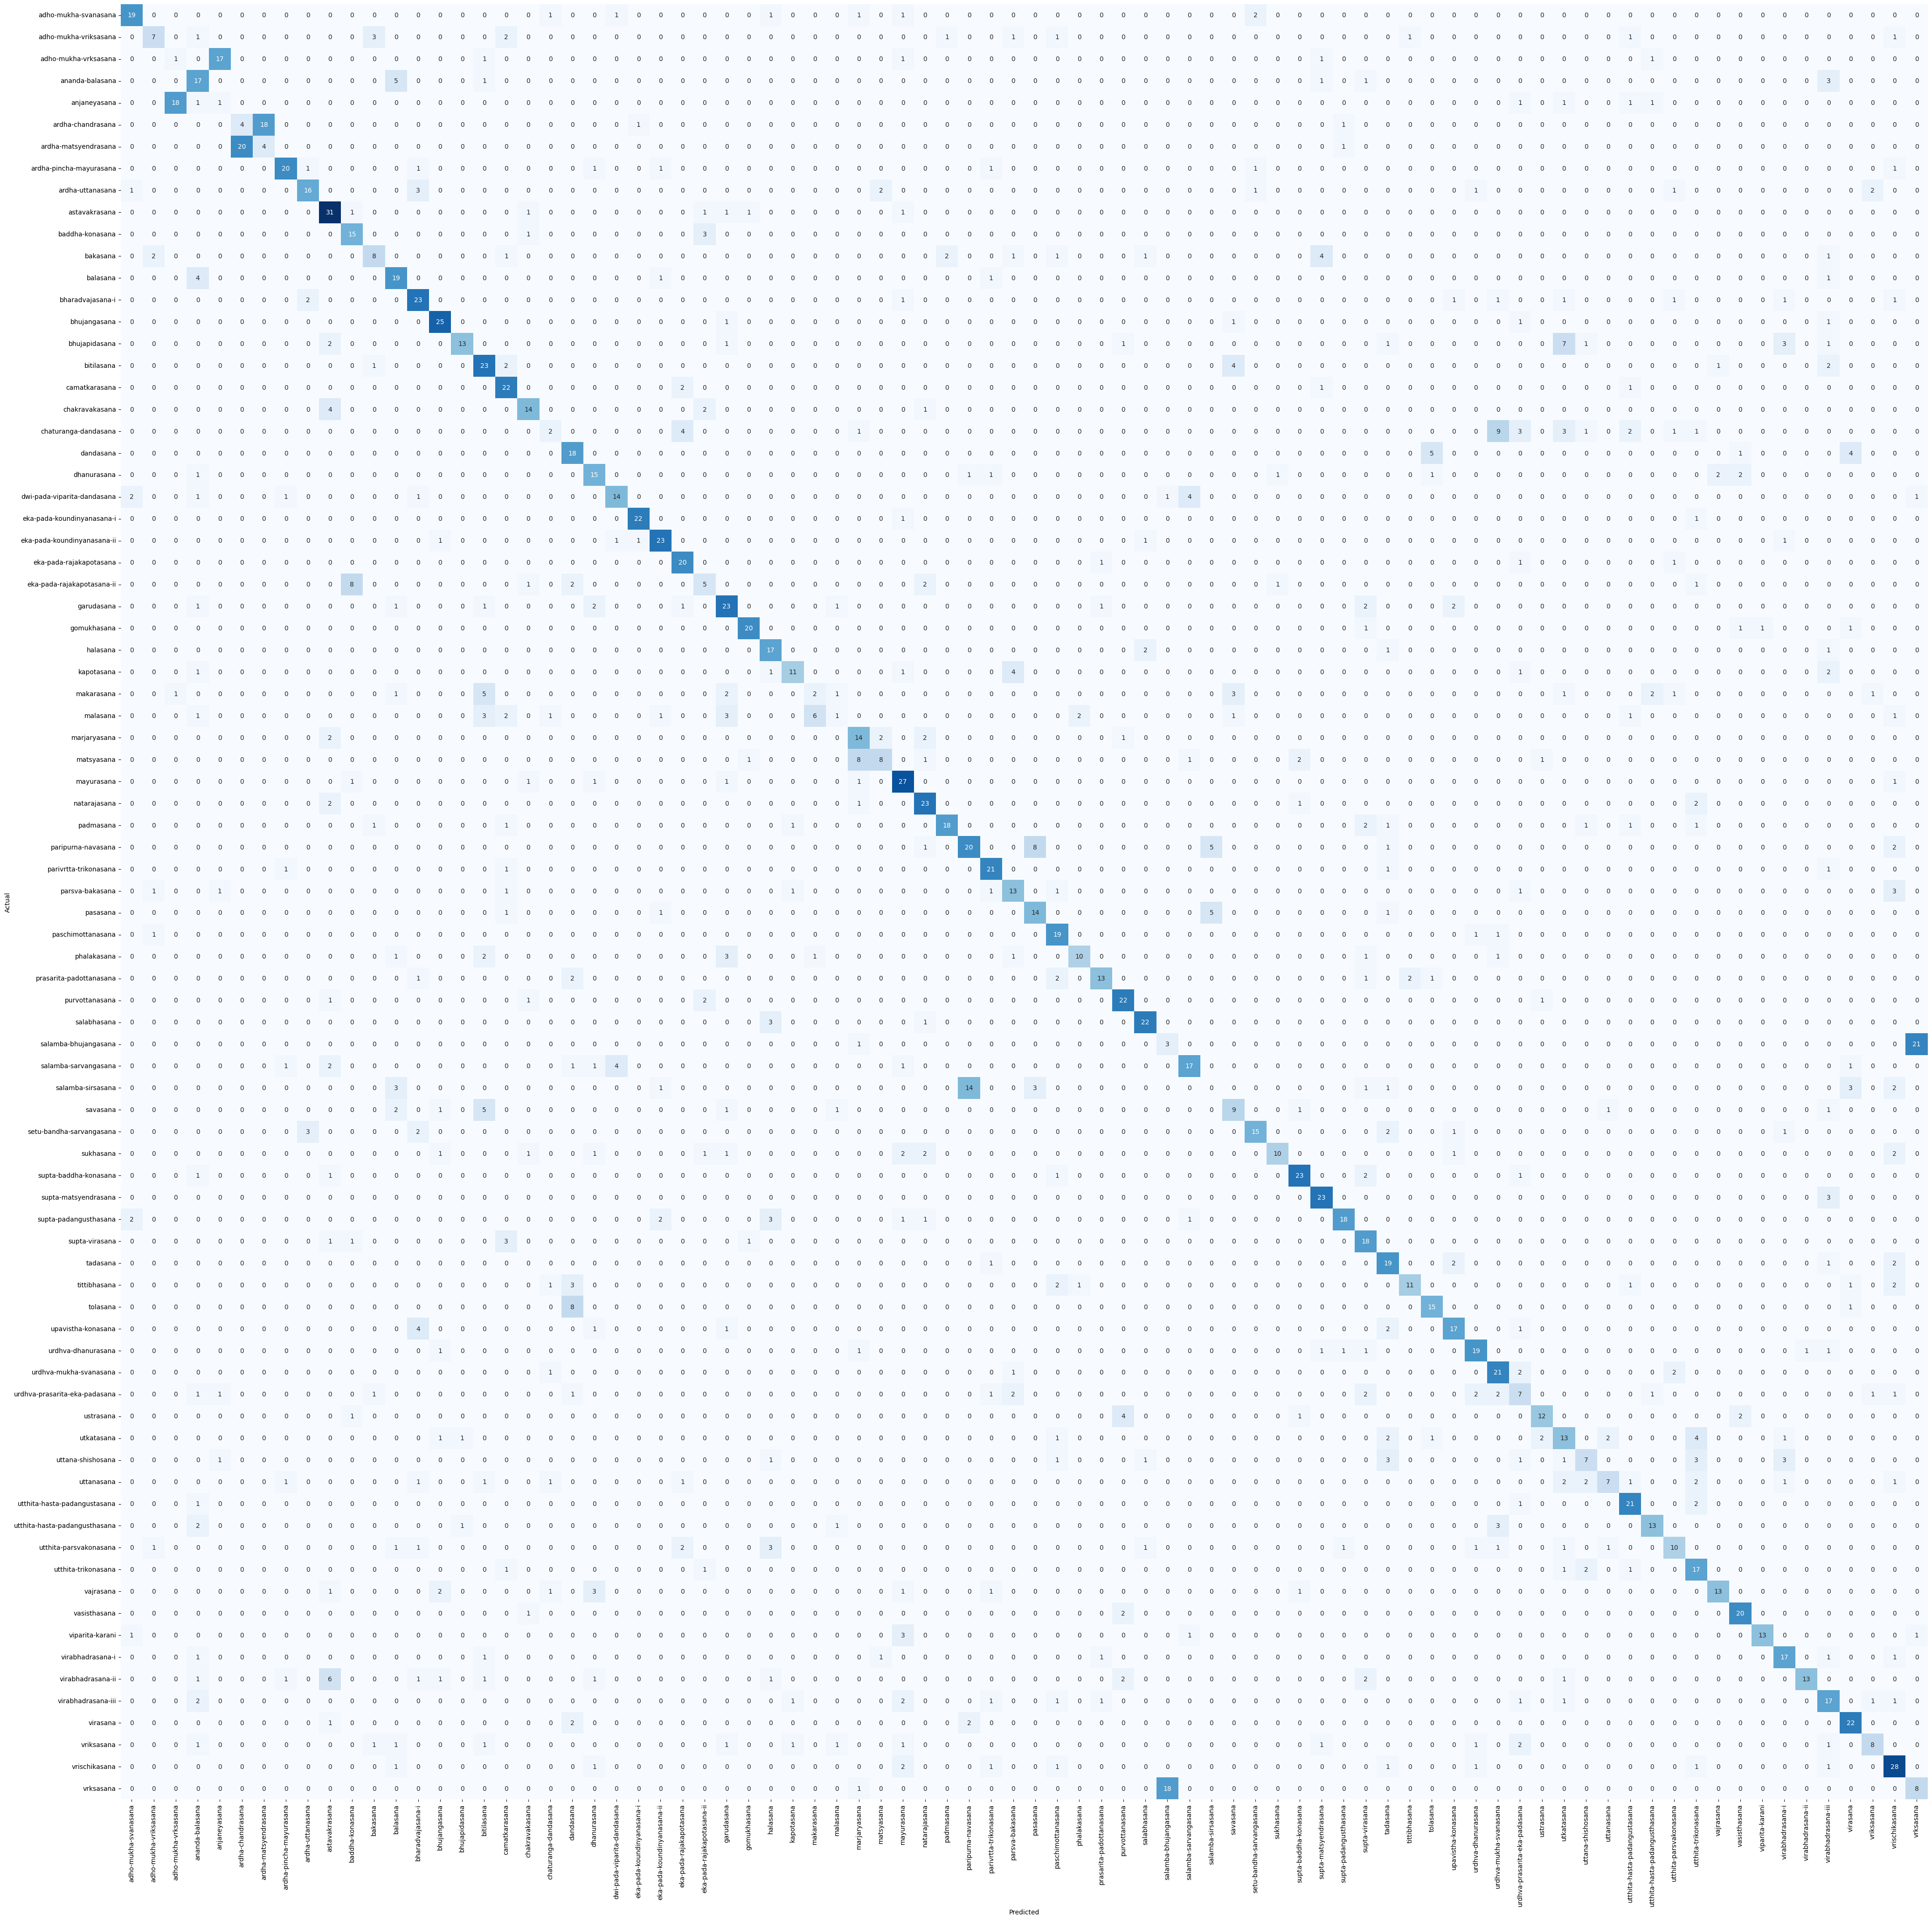

In [27]:
# plot confusion matrix
plt.figure(figsize=(50, 50), dpi=100)
cm_array = confusion_matrix(y_test_labels, y_pred_labels)
cm_array_df = pd.DataFrame(cm_array, index=labels, columns=labels)
sns.heatmap(cm_array_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        26
           1       0.05      0.05      0.05        22
           2       0.05      0.04      0.04        24
           3       0.67      0.87      0.75        23
           4       0.71      0.61      0.65        28
           5       0.61      0.74      0.67        23
           6       0.57      0.84      0.68        37
           7       0.53      0.38      0.44        21
           8       0.54      0.73      0.62        26
           9       0.76      0.86      0.81        29
          10       0.87      0.43      0.58        30
          11       0.51      0.70      0.59        33
          12       0.59      0.85      0.70        26
          13       0.67      0.67      0.67        21
          14       0.49      0.64      0.55        28
          15       0.56      0.62      0.59        24
          16       0.54      0.54      0.54        37
          17       0.70    

<Axes: xlabel='feature'>

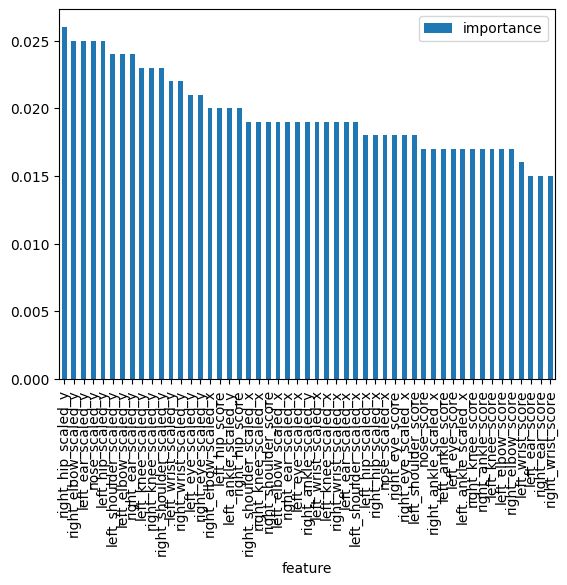

In [29]:
# view feature importances
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(rf.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances.head(15)

# plot feature importances
importances.plot.bar()